# Intro to PyTorch and neural networks

- https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
- https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

<style>
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
    padding: 5px;
}

figcaption {
  font-style: italic;
  padding: 2px;
  text-align: center;
}

</style>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
print(torch.__version__)
torch.cuda.is_available()

2.8.0+cu126


True

In [3]:
# !nvidia-smi

## Intro

### A new programming paradign

 <figure>
  <img src="img/new_par.png" alt="Software 2.0" width="50%">
  <figcaption>A new programming paradign. Software 2.0 (Andrej Karpathy)</figcaption>
</figure>


### Example: Image classification

 <figure>
  <img src="img/vanilla2.png" alt="Image classification" width="50%">
  <figcaption>Image classification</figcaption>
</figure>


### Supervised learning

 <figure>
  <img src="img/supervised.png" alt="Supervised learning" width="50%">
  <figcaption>Supervised learning</figcaption>
</figure>

## Workflow

 <figure>
  <img src="img/dl_workflow.png" alt="workflow" width="70%">
  <figcaption>PyTorch Workflow</figcaption>
</figure>

## Datasets

Dataset stores the samples and their corresponding labels.
Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.
https://docs.pytorch.org/vision/main/datasets.html

In [4]:
# Download training data from open datasets.
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
val_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# ToTensor(): convert numpy to Pytorch Tensor and scales to [0,1]

In [5]:
train_ds.data.shape

torch.Size([60000, 28, 28])

In [6]:
type(train_ds[0]), len(train_ds[0])

(tuple, 2)

In [7]:
first_image, first_label = train_ds[0]

In [8]:
# training_data[0][0].shape, training_data[0][1]
first_image.shape, first_label


(torch.Size([1, 28, 28]), 9)

In [9]:
first_image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [10]:
print(f"Min pixel value in first image: {torch.min(first_image)}")
print(f"Max pixel value in first image: {torch.max(first_image)}")

Min pixel value in first image: 0.0
Max pixel value in first image: 1.0


In [11]:
train_ds.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

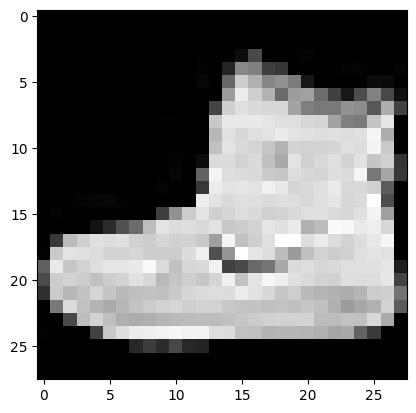

In [12]:
import matplotlib.pyplot as plt

# squeeze(): removes dimensions of size 1
# https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html

"""
Deep learning libraries like PyTorch and TensorFlow typically use channels-first format (C, H, W) for image tensors, while matplotlib expects channels-last format (H, W, C). The transpose operation rearranges the dimensions to make the tensor compatible with matplotlib's expectations.
"""

plt.imshow(first_image.squeeze(), cmap="gray")

In [13]:
first_image.squeeze().shape

torch.Size([28, 28])

In [14]:
# t = (2, 3)
# t[0], t[1]
# f, s = t
# print(f, s)

In [15]:
second_image, second_label = train_ds[1]

second_image.shape, second_label

(torch.Size([1, 28, 28]), 0)

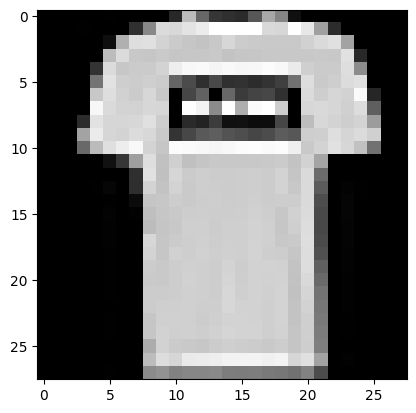

In [16]:
plt.imshow(second_image.squeeze(), cmap="gray")

## Dataloader

The Dataset retrieves our dataset’s features and labels **one sample at a time**. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an **iterable** that abstracts this complexity for us in an easy API.

In [17]:
batch_size = 64

# Create data loaders.
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
val_dl = DataLoader(val_ds, batch_size=batch_size, num_workers=4)

for X, y in val_dl:
    print(f"Shape of X [N, C, H, W]: {X.shape}") # N = batch size
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [18]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## First neural network model (Vanilla or MLP)

 <figure>
  <img src="img/vanilla.jpeg" alt="ml types" width="50%">
  <figcaption>Vanilla or MLP</figcaption>
</figure>

In [19]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [20]:
model = NeuralNetwork()# .to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [21]:
print(model(train_ds[0][0]))

tensor([[-0.1654, -0.0022, -0.0185,  0.0905,  0.0052, -0.0616,  0.1098, -0.0221,
         -0.0148,  0.0771]], grad_fn=<AddmmBackward0>)


### Training

### Process

1. [x] Dataset
2. [x] DataLoader
3. [x] Define the model
4. Define the loss function
5. Define the optimizer
6. Training the model
7. Evaluate the model

https://udlbook.github.io/udlfigures/

### Weights


 <figure>
  <img src="img/weights.png" alt="ml types" width="40%">
  <figcaption>Weights</figcaption>
</figure>



### Loss function

 <figure>
  <img src="img/loss.png" alt="ml types" width="40%">
  <figcaption>Loss function</figcaption>
</figure>



### Optimizer

 <figure>
  <img src="img/optimizer.png" alt="ml types" width="40%">
  <figcaption>Optimizer</figcaption>
</figure>

In [22]:
from training_utils import train, plot_hist, evaluate

In [23]:
# torch.manual_seed(17)
num_epochs = 5
hist = train(model, num_epochs, train_dl, val_dl)

Epoch 1: train_acc: 0.8232 val_acc: 0.8537 train_loss: 0.4833 val_loss: 0.4109
Epoch 2: train_acc: 0.8683 val_acc: 0.8586 train_loss: 0.3577 val_loss: 0.3888
Epoch 3: train_acc: 0.8815 val_acc: 0.8689 train_loss: 0.3188 val_loss: 0.3570
Epoch 4: train_acc: 0.8892 val_acc: 0.8751 train_loss: 0.2959 val_loss: 0.3433
Epoch 5: train_acc: 0.8975 val_acc: 0.8631 train_loss: 0.2766 val_loss: 0.3800


In [28]:
evaluate(model, val_ds)

Test accuracy: 0.8576


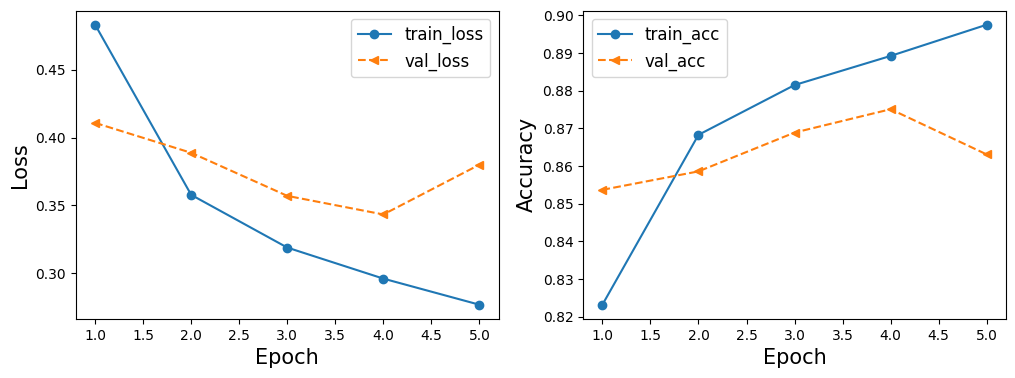

In [25]:
plot_hist(hist)

## Saving and loading a model

In [26]:
torch.save(model.state_dict(), "checkpoints/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [27]:
# model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("checkpoints/model.pth", weights_only=True))

evaluate(model, val_ds)

Test accuracy: 0.8576
